# Practical 1

**This is an individual assignment.**

---

# Question 1 (2 points)

**Suppose we have some binary data, $x_i\in\{0,1\}$. The training data is as follows:**

| $x$ | $t$ |
| -- | -- | 
| $0$  | $[-1,1]^T$ |
| $0$  | $[-1,-2]^T$ |
| $0$  | $[-1,-1]^T$ |
| $1$  | $[1,1]^T$ |
| $1$  | $[1,2]^T$ |
| $1$  | $[2,1]^T$ |

**Let us embed each $x_i$ into a 2-D feature space using the basis function:**

\begin{align*}
\phi(0) = [1,0]^T, \;\;\;\;\; \phi(1)=[0,1]^T
\end{align*}

**Consider the multiple (*Multiple linear regression refers to situations in which the model predicts more than one variable.*) linear regression model $y=\mathbf{W}\phi(x)$, where $\mathbf{W}$ is a $2\times 2$ matrix. Compute the solution for $\mathbf{W}$ using the Least Squares objective function.**

In [13]:
import numpy as np
X=np.array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
t=np.array([[-1,1], [-1,-2], [-1,-1], [1,1], [1,2], [2,1]])
w=np.linalg.inv(X.T@X)@X.T@t
print (w)

[[-1.         -0.66666667]
 [ 1.33333333  1.33333333]]


---

# Question 2 (2 points)

**Consider a training dataset $\{(x_i,t_i)\}_{i=1}^N$ where $x_i\in\mathbb{R}^D$, $t_i\in\mathbb{R}$ and $D$ is the feature space dimensionality. Suppose you are training a linear regression model, $y(x)=\mathbf{w}^T\mathbf{x}+w_0$. Answer the following questions:**

1. (0.5 points) **Consider the objective function:**

\begin{align*}
J(\mathbf{w}) = \sum_{i=1}^N (t_i - y(x_i))^2 + \lambda R(\mathbf{w})
\end{align*}

**What is the role of the regularizer $R(\mathbf{w})$? What is the effect of changing the value of $\lambda$?**

The regularizer R(w) is a function that penalizes certain properties of the weight vector w, typically to prevent overfitting and improve the generalization of the model. Regularization introduces a constraint or preference for simpler models by discouraging excessively large values of the weights.

The value of λ controls the balance between fitting the data and applying regularization, A small λ leads to a model that prioritizes fitting the training data (risk of overfitting). A large λ enforces stronger regularization, reducing the model's complexity (risk of underfitting)

2. (0.5 points) **How would you train a linear regression model that is robust to outliers?**

To modify the objective function so that it is less sensitive to the large errors caused by outliers.
1.Use Huber Loss Instead of Squared Error 2.Use Quantile Regression 3. Regularization Techniques 4.Random Sample Consensus:Iteratively fits the model to random subsets

3. (0.5 points) **Suppose you want to minimize the *squared error* with a *Lasso regularizer*. Write down the objective function.**

The sum of squared errors aims to fit the data by minimizing the error between predicted and actual values.
Lasso regularization encourages sparsity in the weights by adding a penalty proportional to the absolute values of the weights w. A larger λ results in more weights being driven to zero, which effectively performs feature selection.

4. (0.5 points) **In scenarios where at least two dimensions exhibit collinearity, meaning they are linearly dependent, which regularization technique would you employ in your linear regression model while preserving all dimensions?**

Ridge Regression is preferred when dealing with collinearity and when you want to retain all dimensions. It provides a more stable and robust solution by shrinking coefficients rather than eliminating features.
Lasso Regression might be used if you are interested in feature selection, but it may not be suitable if preserving all dimensions is important, especially in the presence of collinearity.
Ridge Regression is the recommended technique for scenarios with collinearity where retaining all features is crucial.

---

In [ ]:
# Import necessary libraries and magics



# Question 4 (3 points)

**In this problem, you will be working with the beer dataset with information about the foam height (in cm) from 3 brands of beer over 15 measurement times (in seconds) after the time of pour.**

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

beer_data = pd.read_csv('beer_foam.csv')

beer_data

,Time,Erdinger,Augustinerbrau,Budweiser
0,0,17.0,14.0,14.0
1,15,16.1,11.8,12.1
2,30,14.9,10.5,10.9
3,45,14.0,9.3,10.0
4,60,13.2,8.5,9.3
5,75,12.5,7.7,8.6
6,90,11.9,7.1,8.0
7,105,11.2,6.5,7.5
8,120,10.7,6.0,7.0
9,150,9.7,5.3,6.2


**Consider the first 12 samples as the training set, and the last 3 samples as the test set.**

In [187]:
x_train = beer_data['Time'].to_numpy()[:12]
x_test  = beer_data['Time'].to_numpy()[12:]

# Note that t_train and t_test contain 3 target vectors. 
# You should build a mapper function to predict 1 target vector at a time.
t_train = beer_data.drop('Time', axis=1).iloc[:12]
t_test  = beer_data.drop('Time', axis=1).iloc[12:]

**Use the Python code implementation we built in class to help you train a mapper function of the form:**

$$y(x) = \exp\left(\sum_{j=0}^M w_jx^j\right) = \exp (\mathbf{X}\mathbf{w})$$

**Answer the following questions:**

1. (1 point) **For each brand, train a mapper function with $M=2$ using the training data. Plot the model prediction.**

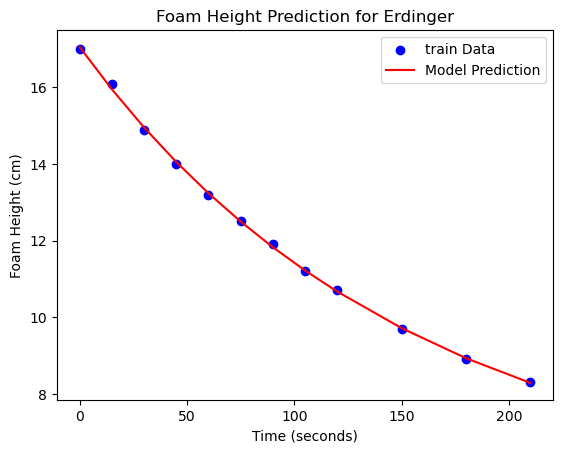

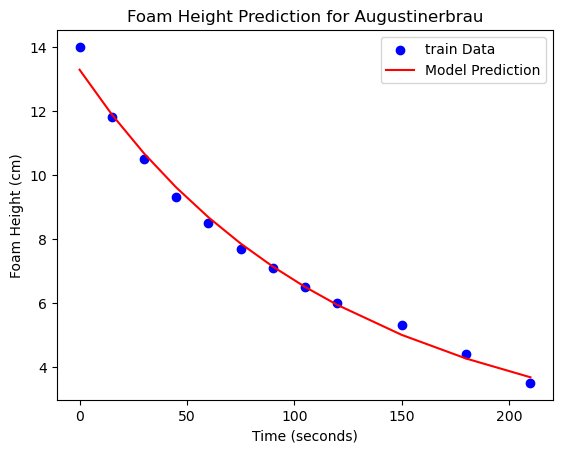

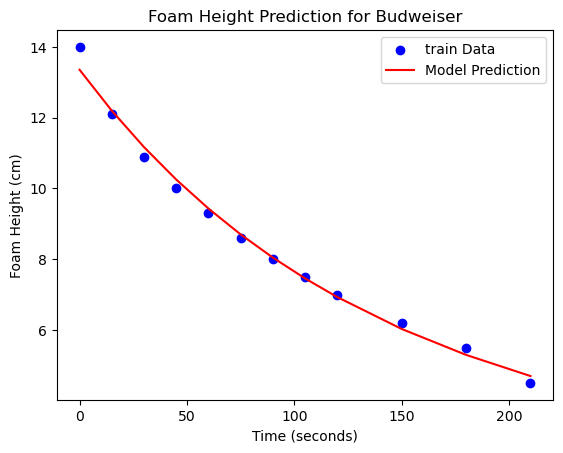

In [185]:
# Function to create polynomial features (degree 2)
def create_polynomial_features(x, degree=2):
    X = np.ones((x.shape[0], degree + 1))
    for i in range(1, degree + 1):
        X[:, i] = x ** i
    return X

# Function to fit the model for each brand
def train_mapper(x, t, degree=2):
    # Create polynomial features
    X = create_polynomial_features(x, degree)
    
    # Fit the weights using least squares
    w = np.linalg.lstsq(X, np.log(t), rcond=None)[0]  # Solve for w
    
    # Predict y(x) = exp(X * w)
    y_pred = np.exp(X @ w)
    
    return y_pred, w

# Train models for each brand
brands = t_train.columns
for brand in brands:
    # Get target values for the current brand
    t_train_brand = t_train[brand].to_numpy()
    
    # Train the mapper function
    y_train_pred, w = train_mapper(x_train, t_train_brand)
    
    # Plot the model prediction vs actual data
    plt.scatter(x_train, t_train_brand, label='train Data', color='blue')
    plt.plot(x_train, y_train_pred, label='Model Prediction', color='red')
    plt.title(f"Foam Height Prediction for {brand}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Foam Height (cm)")
    plt.legend()
    plt.show()

2. (1 point) **Use each trained model to make predictions for the test data.**

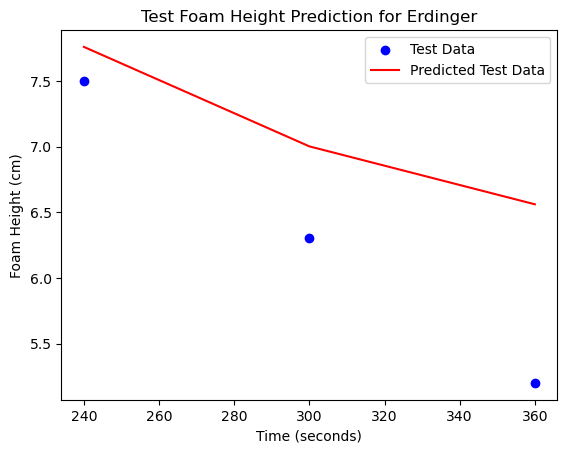

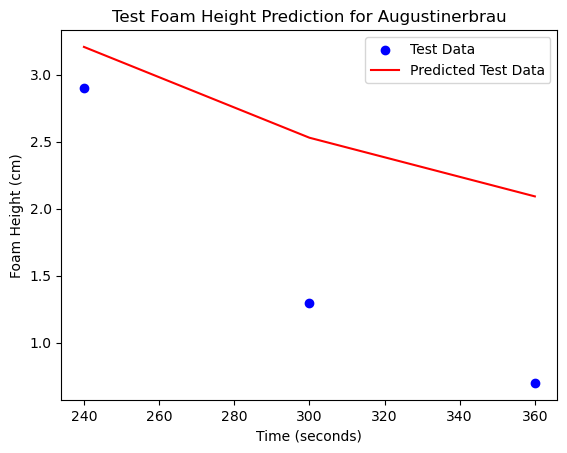

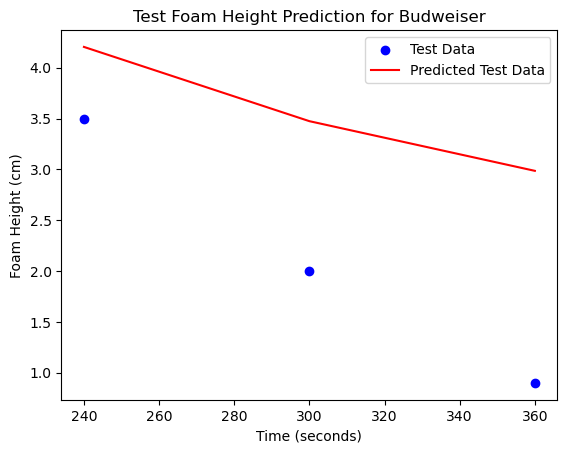

In [198]:
# Function to make predictions using the trained model
def predict(x, w, degree=2):
    # Create polynomial features
    X = create_polynomial_features(x, degree)
    
    # Predict y(x) = exp(X * w)
    y_pred = np.exp(X @ w)
    
    return y_pred

# Predict foam heights for the test data and plot the results
for brand in brands:
    # Get target values for the current brand (training data)
    t_train_brand = t_train[brand].to_numpy()
    
    # Train the mapper function
    y_train_pred, w = train_mapper(x_train, t_train_brand)
    
    # Get the target values for the test data (ground truth)
    t_test_brand = t_test[brand].to_numpy()
    
    # Predict the foam height for the test data
    y_test_pred = predict(x_test, w)
    
    # Plot the model prediction vs actual test data
    plt.scatter(x_test, t_test_brand, label='Test Data', color='blue')
    plt.plot(x_test, y_test_pred, label='Predicted Test Data', color='red')
    plt.title(f"Test Foam Height Prediction for {brand}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Foam Height (cm)")
    plt.legend()
    plt.show()

3. (1 point) **For each brand, predict foam height at $t=450$ seconds.**

In [151]:
# Function to predict foam height at a specific time point (e.g., t=450)
def predict_at_time(t, w, degree=2):
    # Create polynomial features for the single time point
    X = create_polynomial_features(np.array([t]), degree)
    
    # Predict y(x) = exp(X * w)
    y_pred = np.exp(X @ w)
    
    return y_pred[0]  # Return the predicted foam height
# Predict foam heights at t=450 for each brand
t_450 = 450
for brand in brands:
    # Get target values for the current brand (training data)
    t_train_brand = t_train[brand].to_numpy()
    
    # Train the mapper function
    _, w = train_mapper(x_train, t_train_brand)
    
    # Predict foam height at t=450 seconds
    foam_height_450 = predict_at_time(t_450, w)
    
    # Print the result for the brand
    print(f"Predicted foam height for {brand} at t=450 seconds: {foam_height_450:.2f} cm")

Predicted foam height for Erdinger at t=450 seconds: 6.39 cm
Predicted foam height for Augustinerbrau at t=450 seconds: 1.72 cm
Predicted foam height for Budweiser at t=450 seconds: 2.56 cm


---

# Question 5 (2 points)

**Consider the [**computer hardware dataset**](https://archive.ics.uci.edu/ml/datasets/Computer+Hardware). The goal is to predict the estimated relative performance (ERP) of a CPU core as a function of 9 features (or independent variables):**

* **Vendor name:** 30 (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, sratus, wang)
* **Model Name:** many unique symbols
* **MYCT:** machine cycle time in nanoseconds (integer)
* **MMIN:** minimum main memory in kilobytes (integer)
* **MMAX:** maximum main memory in kilobytes (integer)
* **CACH:** cache memory in kilobytes (integer)
* **CHMIN:** minimum channels in units (integer)
* **CHMAX:** maximum channels in units (integer)
* **PRP:** published relative performance (integer)

**And the target is:**

* **ERP:** estimated relative performance from the original article (integer).

In [175]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

hardware=pd.read_csv('machine.data',
                 names=['Vendor','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])
hardware

,Vendor,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [165]:
data = hardware.drop('ERP', axis=1)
data

,Vendor,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,adviser,32/60,125,256,6000,256,16,128,198
1,amdahl,470v/7,29,8000,32000,32,8,32,269
2,amdahl,470v/7a,29,8000,32000,32,8,32,220
3,amdahl,470v/7b,29,8000,32000,32,8,32,172
4,amdahl,470v/7c,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46
206,sratus,32,125,2000,8000,0,2,14,52
207,wang,vs-100,480,512,8000,32,0,0,67


In [167]:
target = hardware['ERP']
target

0      199
1      253
2      253
3      253
4      132
      ... 
204     37
205     50
206     41
207     47
208     25
Name: ERP, Length: 209, dtype: int64

**Consider only the numerical features: MYCT, MMIN, MMAX, CACH, CHMIN, CHMAX, and PRP.**

**Answer the following questions:**

1. (0.5 points) **Partition the data randomly using an 80/20 split. See [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).**

In [179]:
#  Load the dataset
hardware = pd.read_csv('machine.data',
                       names=['Vendor','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])

#  Select only the numerical features
data = hardware[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']]
target = hardware['ERP']

# Split the data using train_test_split with an 80/20 split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

2. (1 point) **Train a multivariate regression model using the training data.**

In [171]:
#  Initialize the Linear Regression model
model = LinearRegression()

#  Fit the model on the training data
model.fit(data_train, target_train)

#  Print the model's coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [ 0.03216256  0.00360426  0.00408698  0.32243938 -0.23783053  0.23001715
  0.47875042]
Model intercept: -29.841465383500548


3. (0.5 point) **Make predictions in the test set and report performance.**

In [177]:
predictions = model.predict(data_test)

mse = mean_squared_error(target_test, predictions)

r2 = r2_score(target_test, predictions)

print(f"Mean Squared Error (MSE) on the test set: {mse:.2f}")
print(f"R-squared (R²) on the test set: {r2:.2f}")

Mean Squared Error (MSE) on the test set: 3007.89
R-squared (R²) on the test set: 0.94


---

# On-Time (1 point)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___